In [17]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob #polarity(-1 to 1) and subjectivity(0 to 1) 

   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
    --------------------------------------- 0.2/11.7 MB 6.9 MB/s eta 0:00:02
   - -------------------------------------- 0.5/11.7 MB 5.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/11.7 MB 5.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/11.7 MB 4.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/11.7 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.7 MB 4.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.7 MB 4.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/11.7 MB 4.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.7 MB 4.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.7 MB 4.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.9/11.7 MB 4.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.9/11.7 MB 3.8 MB/s eta 0:00:03
   ---

Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "C:\Users\pavani\anaconda3\Lib\site-packages\spacy\__init__.py", line 13, in <module>
    from . import pipeline  # noqa: F401
    ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pavani\anaconda3\Lib\site-packages\spacy\pipeline\__init__.py", line 1, in <module>
    from .attributeruler import AttributeRuler
  File "C:\Users\pavani\anaconda3\Lib\site-packages\spacy\pipeline\attributeruler.py", line 8, in <module>
    from ..language import Language
  File "C:\Users\pavani\anaconda3\Lib\site-packages\spacy\language.py", line 43, in <module>
    from .pipe_analysis import analyze_pipes, print_pipe_analysis, validate_attrs
  File "C:\Users\pavani\anaconda3\Lib\site-packages\spacy\pipe_analysis.py", line 6, in <module>
    from .tokens import Doc, Span, Token
  File "C:\Users\pavani\an

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --- ------------------------------------ 51.2/626.3 kB 1.3 MB/s eta 0:00:01
   ----------------- ---------------------- 276.5/626.3 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 5.6 MB/s eta 0:00:00


In [13]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

sentiment                                               text
0  Positive  im getting on borderlands and i will murder yo...
1  Positive  I am coming to the borders and I will kill you...
2  Positive  im getting on borderlands and i will kill you ...
3  Positive  im coming on borderlands and i will murder you...
4  Positive  im getting on borderlands 2 and i will murder ...

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [82]:
df.isnull().sum()

sentiment      0
text         686
dtype: int64

In [86]:
df.dropna(inplace=True)


text
70     611
3      566
2      500
36     485
57     480
      ... 
427      1
426      1
394      1
434      1
374      1
Name: count, Length: 402, dtype: int64

In [90]:
sum(df['text'].apply(len)>5),sum(df['text'].apply(len)<=5)

(72883, 1764)

In [92]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(74647, 2)
(72883, 2)


In [100]:
df.sample(10)

sentiment                                               text
61157    Positive  Watching Desperate Housewives and playing spor...
12577  Irrelevant  I have good reason to believe that @ StepBackR...
75469     Neutral  just lost a game of league of legends bc my pc...
1477      Neutral  The full moon was turning? Gaige pounced with ...
22943     Neutral  this contest for csgo will go that well... med...
47136    Negative  I will be boycotting Home Depot I can shop oth...
65367    Positive  Wow! So missing blitz, BUT, now time for train...
35311    Positive         100% pre-order. This is a sexy controller.
199      Negative              Fuck it. pic.twitter.com / Wav1bacr5j
11173    Negative  Honest pony dragon, do you know that Watch Dog...

In [102]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

DATA PREPROCESSING

In [110]:
import sys #python intrepreter and environment
print(sys.executable)#providing the abosolute path to run the code


C:\Users\pavani\anaconda3\python.exe


In [112]:
import preprocess_kgptalkie as ps
df.columns

TypeError: ForwardRef._evaluate() missing 1 required keyword-only argument: 'recursive_guard'

In [114]:
pip install --upgrade pydantic spacy



     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/125.2 kB ? eta -:--:--
     --------- --------------------------- 30.7/125.2 kB 262.6 kB/s eta 0:00:01
     -------------------------------------  122.9/125.2 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ 125.2/125.2 kB 736.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/423.9 kB ? eta -:--:--
   ---------------------------------- ----- 368.6/423.9 kB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 423.9/423.9 kB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   -------- ------------------------------- 0.4/1.9 MB 8.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/1.9 MB 6.1 MB/s eta 0:00:01
   ----------------------- ---------------- 1.1/1.9 MB 8.0 MB/s eta 0:00:01
   ------------------------------ --------- 1.5/1.9 MB 8.4 MB/s eta 0:00:01
   -----

In [116]:
import preprocess_kgptalkie as ps
df.columns

TypeError: ForwardRef._evaluate() missing 1 required keyword-only argument: 'recursive_guard'

In [ ]:
!pip uninstall spacy
!pip install spacy


In [ ]:
conda create -n new_env python=3.9
conda activate new_env
pip install spacy pydantic preprocess_kgptalkie


In [1]:
import preprocess_kgptalkie as ps
df.columns

ModuleNotFoundError: No module named 'en_core_web_sm'

In [3]:
!pip install spacy


In [9]:
!python -m spacy download en_core_web_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
import preprocess_kgptalkie as ps
df.columns

Index(['sentiment', 'text'], dtype='object')

In [43]:
import preprocess_kgptalkie as ps
df = ps.get_basic_features(df)


ZeroDivisionError: division by zero

TEXT PREPROCESSION ON PANDAS 

In [51]:
df = pd.DataFrame(df)

# Ensure 'text' column is of string type and handle NaNs
df['text'] = df['text'].astype(str).fillna('')

# Define helper functions
def _get_charcounts(x):
    return len(x.replace(" ", "")) if x else 0

def _get_wordcounts(x):
    return len(x.split()) if x else 0

def _get_avg_wordlength(x):
    word_count = _get_wordcounts(x)
    if word_count == 0:
        return 0  # or np.nan
    char_count = _get_charcounts(x)
    return char_count / word_count

# Apply the function
df['avg_wordlength'] = df['text'].apply(lambda x: _get_avg_wordlength(x))

print(df)

        sentiment                                               text  \
0        Positive  im getting on borderlands and i will murder yo...   
1        Positive  I am coming to the borders and I will kill you...   
2        Positive  im getting on borderlands and i will kill you ...   
3        Positive  im coming on borderlands and i will murder you...   
4        Positive  im getting on borderlands 2 and i will murder ...   
...           ...                                                ...   
75677  Irrelevant  ⭐️ Toronto is the arts and culture capital of ...   
75678  Irrelevant  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...   
75679    Positive  Today sucked so it’s time to drink wine n play...   
75680    Positive  Bought a fraction of Microsoft today. Small wins.   
75681     Neutral  Johnson & Johnson to stop selling talc baby po...   

       char_counts  word_counts  avg_wordlength  
0               43           11        3.909091  
1               40           12    

In [53]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength'], dtype='object')

In [55]:
df.head()

sentiment                                               text  char_counts  \
0  Positive  im getting on borderlands and i will murder yo...           43   
1  Positive  I am coming to the borders and I will kill you...           40   
2  Positive  im getting on borderlands and i will kill you ...           41   
3  Positive  im coming on borderlands and i will murder you...           42   
4  Positive  im getting on borderlands 2 and i will murder ...           46   

   word_counts  avg_wordlength  
0           11        3.909091  
1           12        3.333333  
2           10        4.100000  
3           10        4.200000  
4           12        3.833333

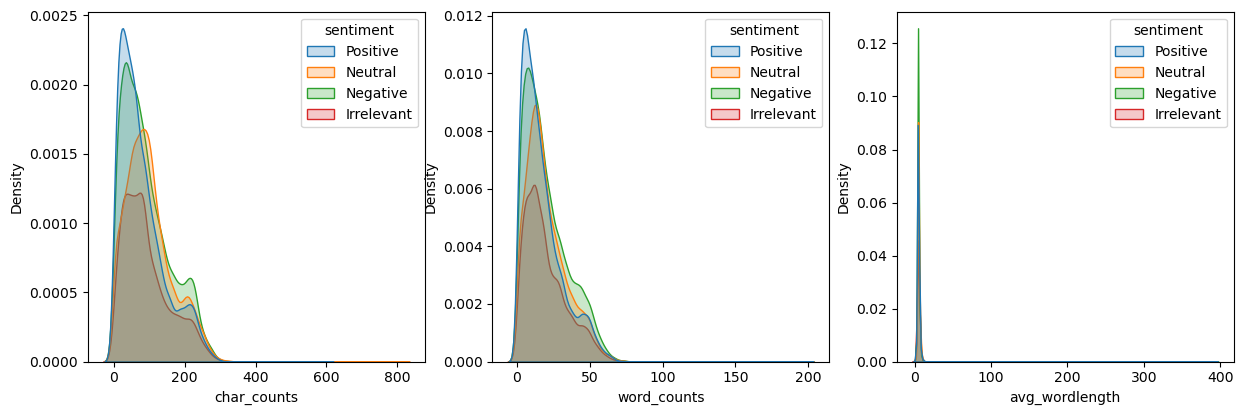

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

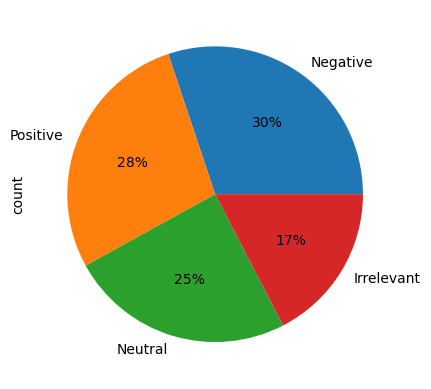

In [61]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

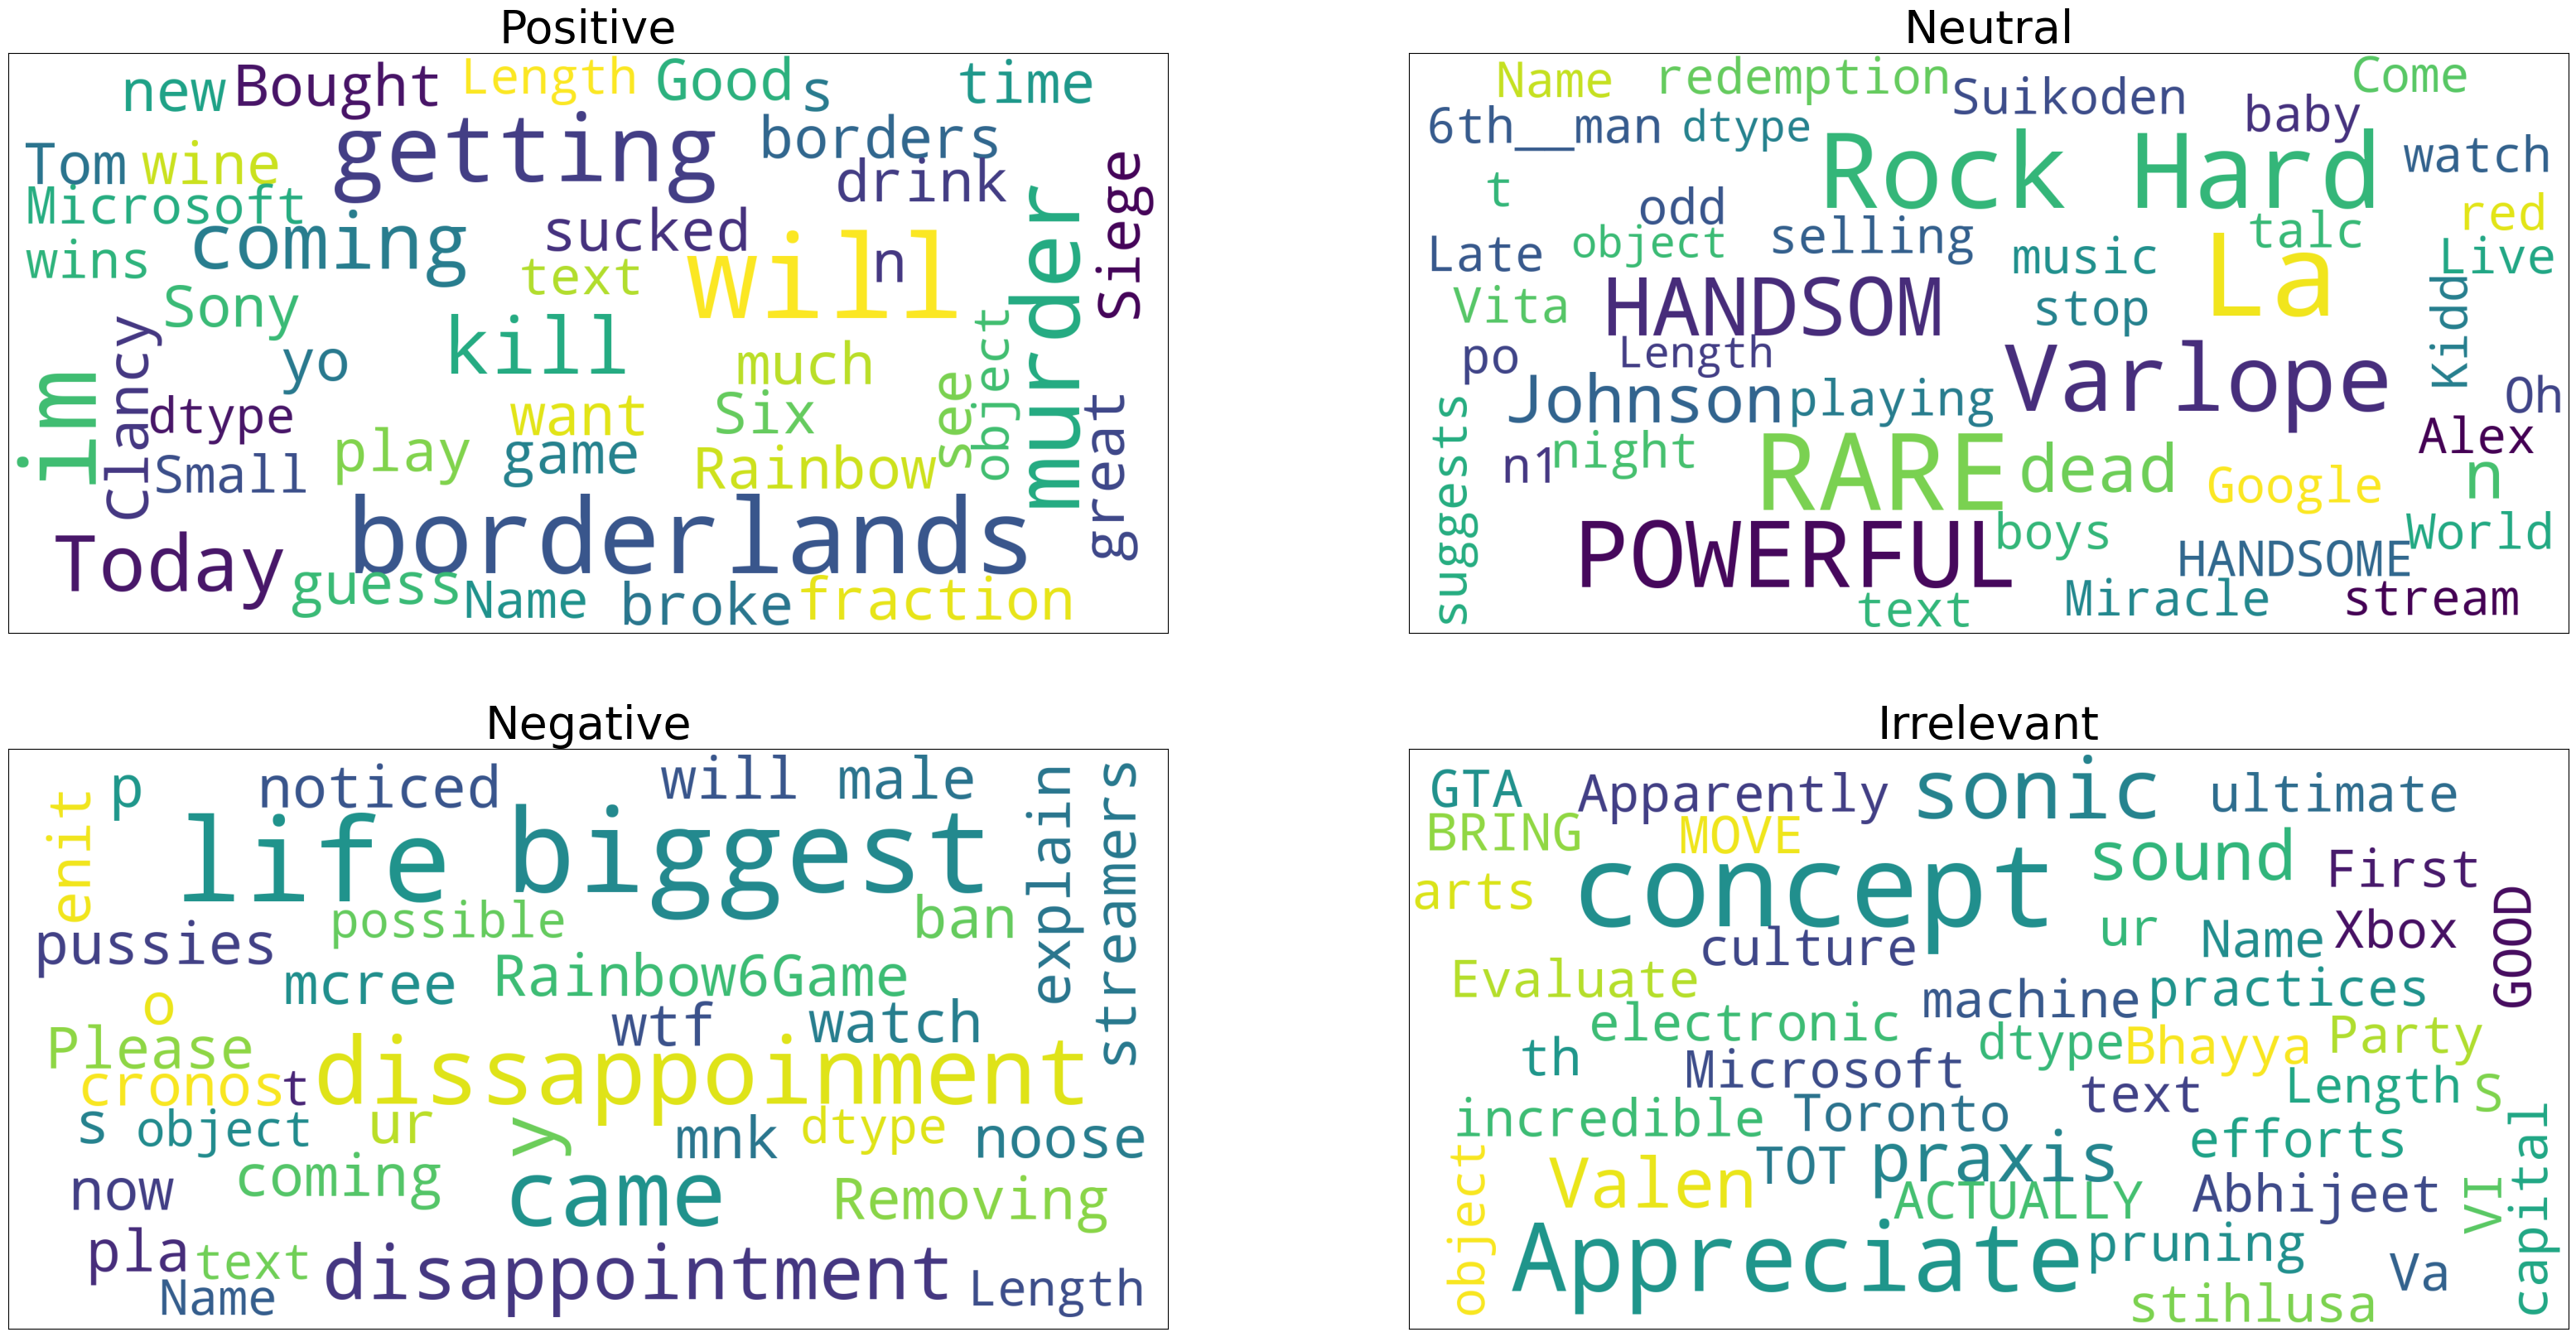

<Figure size 640x480 with 0 Axes>

In [63]:
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [85]:
!pip install wordcloud #visulaization te text data in diagramatic format

In [89]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
print(stopwords)

{'each', "hasn't", 'any', "hadn't", 'have', 'would', 'hers', 'having', 'hence', 'her', 'which', 'there', 'few', 'other', 'against', 'www', 'but', "there's", "she'd", "i'd", "let's", "that's", 'where', "we're", 'who', 'why', 'some', 'ours', 'than', "how's", 'nor', "where's", 'themselves', "don't", 'him', 'the', 'they', 'whom', 'then', 'that', 'too', 'does', 'did', 'into', 'with', 'an', 'ever', 'were', 'shall', 'same', 'such', 'to', "we've", 'can', "they're", 'more', 'been', "i'm", 'it', 'our', "aren't", 'further', 'ourselves', 'again', 'a', 'from', "doesn't", 'since', "he's", "they'll", "i'll", 'once', 'could', 'or', 'of', "wasn't", 'on', "you've", "who's", 'below', 'she', 'if', 'how', "won't", 'his', "why's", 'before', 'after', 'those', "here's", 'all', 'like', 'therefore', 'under', 'because', 'this', "he'll", "he'd", 'himself', 'he', 'for', 'just', 'up', 'being', 'do', 'during', 'its', "they'd", 'also', 'i', 'are', 'http', 'me', "she'll", "you're", "shan't", 'here', 'myself', 'cannot'

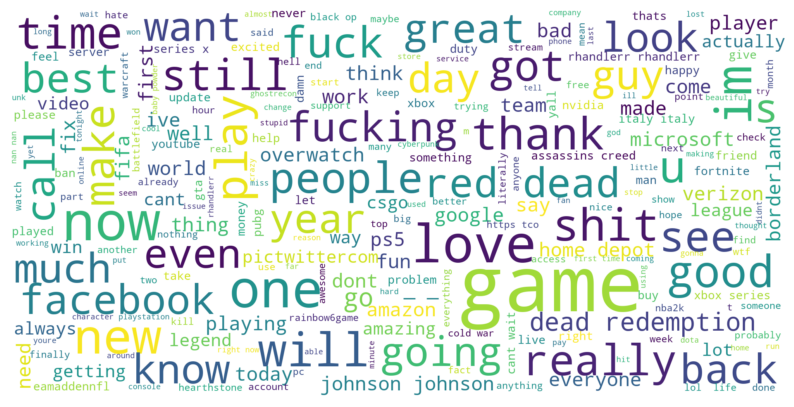

In [95]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=40,
    scale=5
).generate(' '.join(df['text'].astype(str)))

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

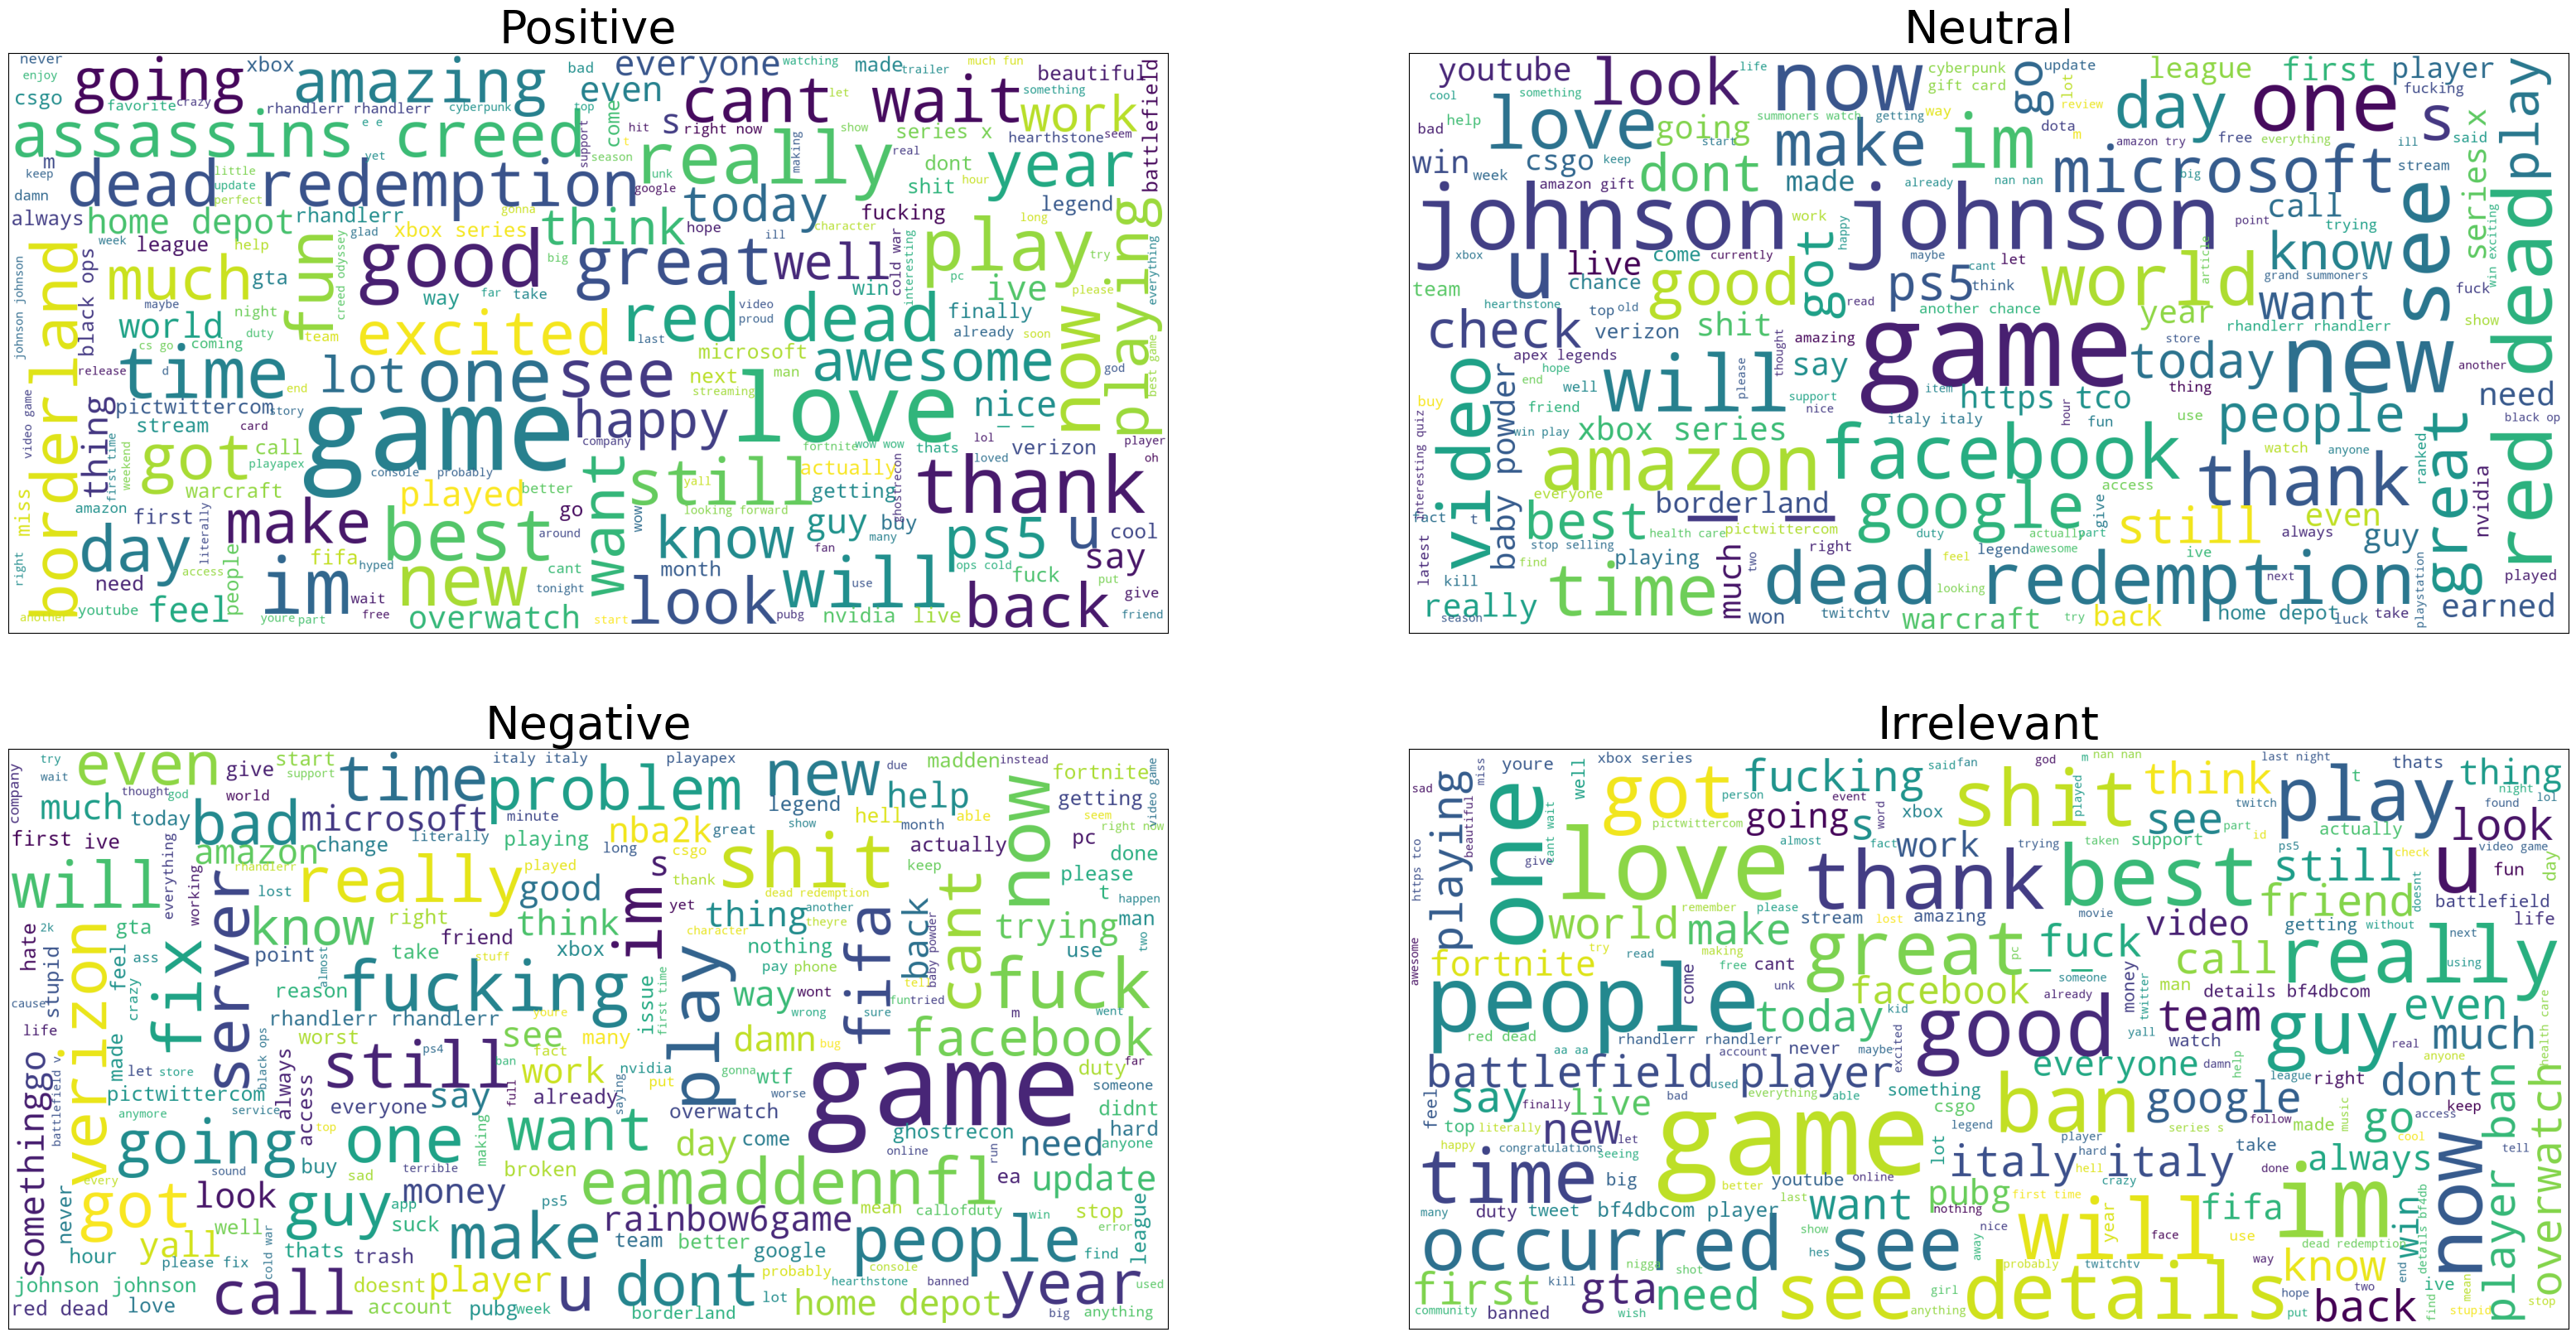

In [106]:
plt.figure(figsize=(40,20))
for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    data=df[df['sentiment']==sent]['text']
    wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=40,
    scale=5
).generate(' '.join(data.astype(str)))
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent,fontsize=40)

# Data Cleaning
# lowercase, remove url, html, punctuations, retwee

In [108]:


df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

# train test split

In [10]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

NameError: name 'df' is not defined

In [ ]:
print("Training set (X_train):")
print(X_train)
print("\nTest set (X_test):")
print(X_test)

print("\nTraining labels (y_train):")
print(y_train)

print("\nTest labels (y_test):")
print(y_test)

In [112]:
X_train.shape, X_test.shape

((60545,), (15137,))

#model building and training !

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Convert the set to a list
stopwords_list = list(stopwords)

# Define the pipeline
clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords_list)),
    ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))
])

# Fit the model
clf.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['each', "hasn't", 'any', "hadn't",
                                             'have', 'would', 'hers', 'having',
                                             'hence', 'her', 'which', 'there',
                                             'few', 'other', 'against', 'www',
                                             'but', "there's", "she'd", "i'd",
                                             "let's", "that's", 'where',
                                             "we're", 'who', 'why', 'some',
                                             'ours', 'than', "how's", ...])),
                ('clf', RandomForestClassifier(n_jobs=-1))])

#evaluation

In [121]:
#evaluation
from sklearn.metrics import classification_report

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

  Irrelevant       0.97      0.84      0.90      2567
    Negative       0.92      0.92      0.92      4571
     Neutral       0.90      0.89      0.89      3790
    Positive       0.85      0.93      0.89      4209

    accuracy                           0.90     15137
   macro avg       0.91      0.90      0.90     15137
weighted avg       0.91      0.90      0.90     15137



In [123]:
# save model
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [131]:
clf.predict(['i hate you '])

array(['Irrelevant'], dtype=object)